<a href="https://colab.research.google.com/github/kinanajoudeh/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Kinana Jouda


## Project Overview

## Load and Inspect Data

- Loading Data
  1. Mounting to Google Drive

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
fpath = "/content/drive/MyDrive/Axos DA/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [119]:
df[df['Item_Identifier'] == 'DRA12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308


## Clean Data

  1. Rows and Columns:

  There are 8523 rows and 12 columns

  2. Variables Datatypes:

  [ *Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales* ] are **Floats**

  [ *Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type* ] are **Strings**

    *Outlet_Establishment_Year* is an **Integer**
  



3.  Duplicates:

In [120]:
duplicated_filter = df.duplicated()
print("The number of duplicated rows in the data is: ", duplicated_filter.sum())

The number of duplicated rows in the data is:  0


  Check Item Ids duplication

In [121]:
ids_duplicated_filter = df['Item_Identifier'].duplicated()
print("The number of duplicated Item Ids in the data is: ", ids_duplicated_filter.sum())

The number of duplicated Item Ids in the data is:  6964


In [122]:
Item_Id_dups = df[ids_duplicated_filter]
Item_Id_dups = Item_Id_dups.sort_values(by='Item_Identifier')
Item_Id_dups

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
...,...,...,...,...,...,...,...,...,...,...,...,...
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [123]:
id_weight_df = Item_Id_dups[['Item_Identifier', 'Item_Weight']]
id_weight_df = id_weight_df.groupby('Item_Identifier').mean()
id_weight_df

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


  - **TO DO:** check the relation between the item id and other features like visibility.

4. Missing Values:

    There are 1463 missing values in the Item_Weight column and 2410 in the Outlet_Size column

In [124]:
missing = df.isna().sum()
missing

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [125]:
print(df['Item_Weight'].dtypes)
print(df['Outlet_Size'].dtypes)

float64
object


  - Here we notice that the Item_Weight is a numeric column and the Oulet_Size is a categorical column

5. Addressing the missing values using a place holder:
    
* Outlet Size is a categorical column that should be replaced by "MISSING"

In [126]:
df['Outlet_Size'].fillna('Missing', inplace=True)

  * Item Weight is a numeric column that we need to choose a good value that shouldn't affect the distibution, like the mean, the median ...

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

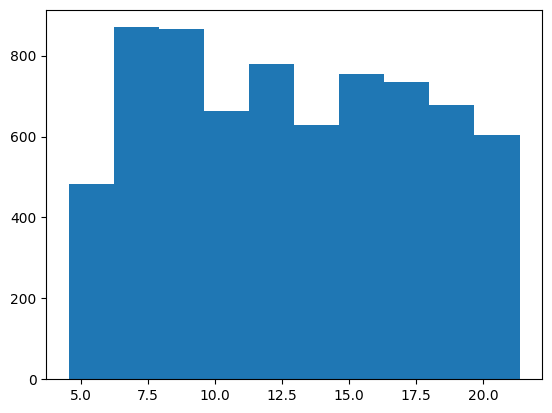

In [127]:
plt.hist(df['Item_Weight'])

In [128]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


  - The data doesn't seem to have outliers, mean and median are close to each other ==> we can just use the mean as a placeholder for the missing values

In [129]:
id_weight_df.describe()

,Item_Weight
count,1544.000000
mean,12.807270
std,4.653414
min,4.555000
25%,8.710000
50%,12.600000
75%,16.750000
max,21.350000


Here, we see that the ( item ids - weight ) distribution of the whole data is the same as the distribution of the data (item ids - weight mean) after grouping them by item id using the weight mean ===> is the same.


As a result, filling the missing values in the item weight by the global mean is enough.


In [130]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

6. Missing values after addressing them

In [131]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


7. Data Inconsistancy:

In [132]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  print("Value counts for column: ", df[col].value_counts())
  print("\n")

Value counts for column:  Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value counts for column:  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column:  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value counts for column:  Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT

Notice that the Item_Fat_Content col has inconsistencies ==> Replace as follows:

In [133]:
replcaments = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replcaments)
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


8. Summery Statistics:

In [134]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

## Feature Inspection